In [2]:
from data import *
from model import *
from plot import *
from train import *
import time
from matplotlib import pylab
import datafold.pcfold as pfold
import seaborn as sns

%load_ext autoreload
%autoreload 2

## Swiss Roll

d:\study-TUM\23ss\praktikum\Final project\final_proj\sum_dmap_test\plot.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


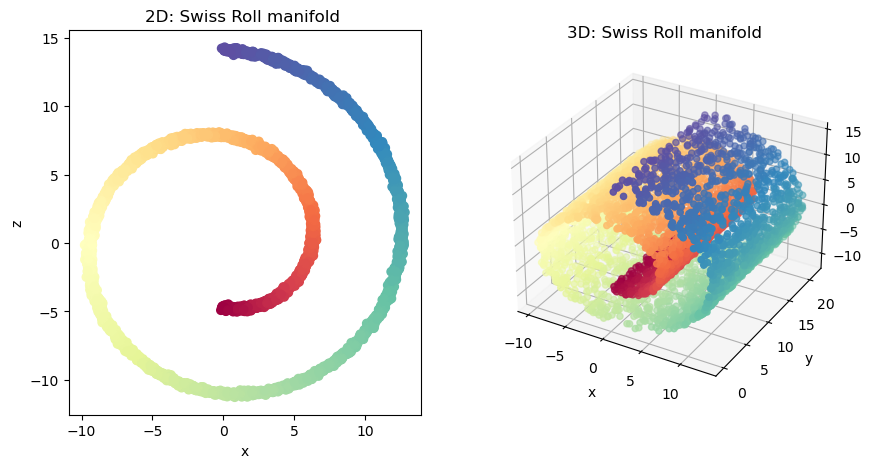

In [3]:
#n=50000 crashed
#n=40000 crashed
#n=30000 crashed
#n=20000 crashed
nr_samples=5000
data, timesteps = get_swiss_roll(nr_samples)
plot_swiss_roll(nr_samples,data, timesteps)

In [5]:
L=10
dmap = DiffusionMap()
start = time.time()
evecs, evals = dmap.diffusion_map_datafold(data,L,isSwissRoll=True,isWordVec=False)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 3.63584303855896


Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99945708 0.99780713 0.99512813 0.99140882 0.99095022
 0.99034283 0.9887835  0.98661062 0.98596735]


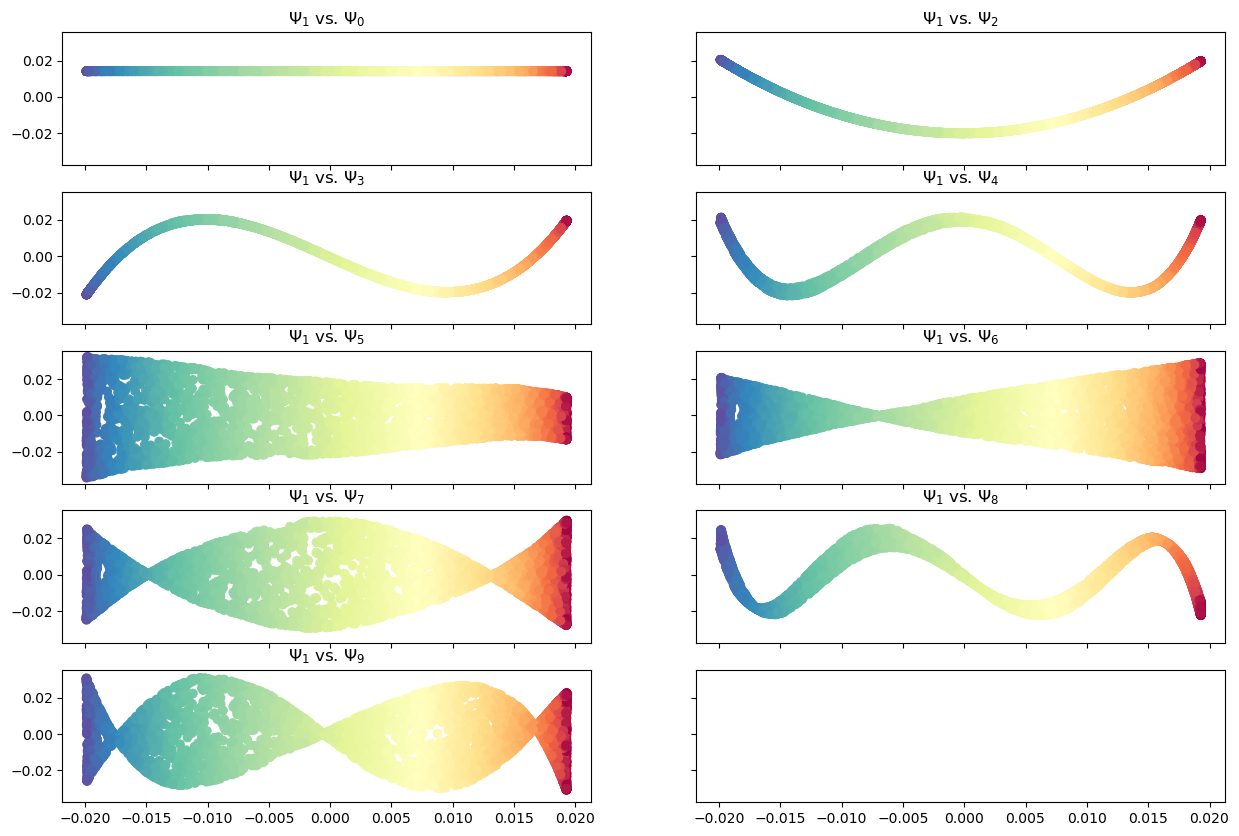

In [6]:
plot_diffusion_maps(nr_samples, L, evecs, evals ,time=timesteps)

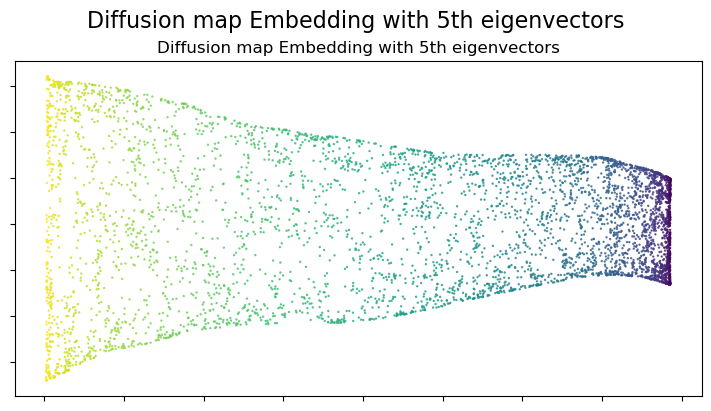

In [7]:
phi_l_plot = np.concatenate((evecs[:, 1].reshape(-1, 1), evecs[:, 5].reshape(-1, 1)), axis=1)
plot_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 5th eigenvectors")

## Word2vec

In [2]:
gensim_model  = gensim.downloader.load("word2vec-google-news-300")

In [3]:
#10000 crashed
num_data_sample=5000

index = np.random.randint(0, len(gensim_model.index_to_key), (num_data_sample))
words = [gensim_model.index_to_key[i] for i in index]
embeddings = [gensim_model[word] for word in words]

In [4]:
data_word=np.array(embeddings)
X = data_word

In [14]:
start = time.time()
Word_dmap=diffusion_map_datafold(X,isSwissRoll=False,isWordVec=True)
end = time.time()
print(f"The run time is : {end - start}")

NameError: name 'diffsuion_map_embedding' is not defined

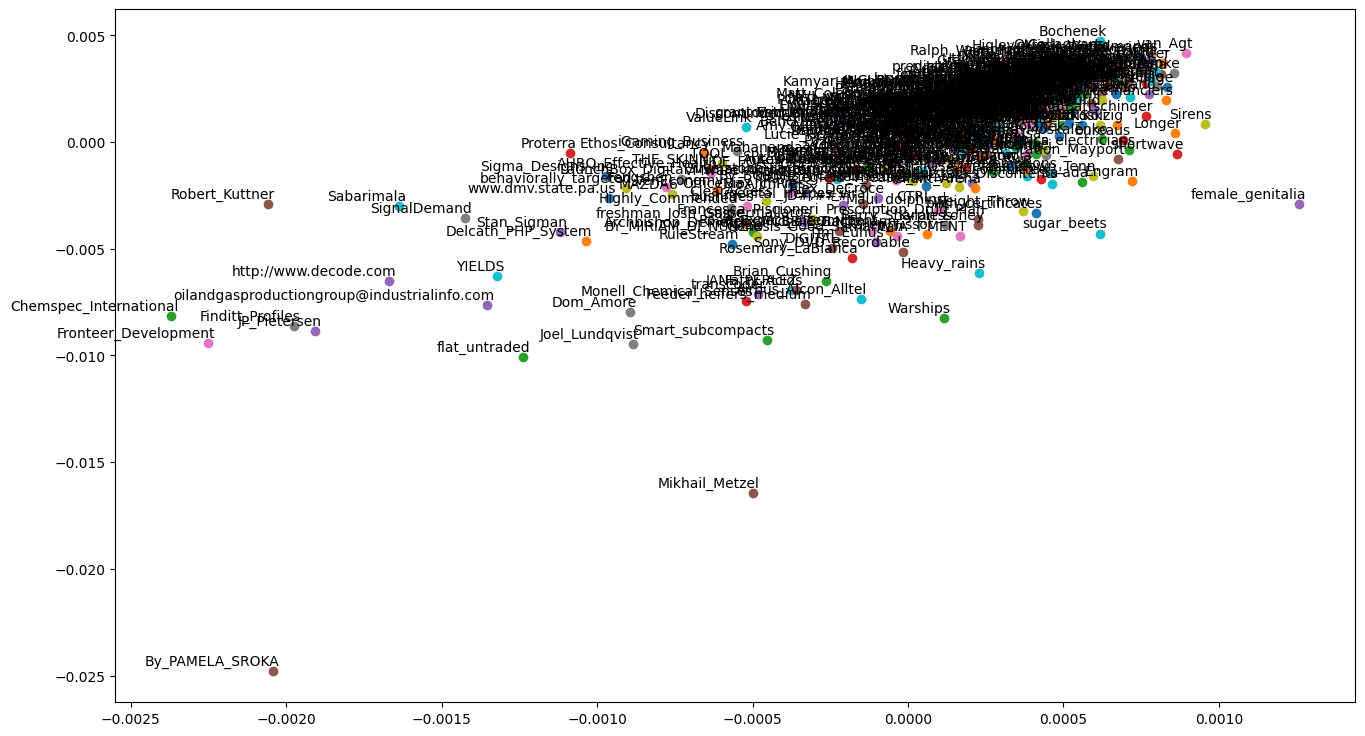

In [19]:
plot_word_embedding_damp(Word_dmap,words)

## Cifar 10

In [2]:
train_loader, val_loader, test_loader = cifar10(train_val_split = [45000, 5000], batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


images.shape: torch.Size([32, 3, 32, 32])


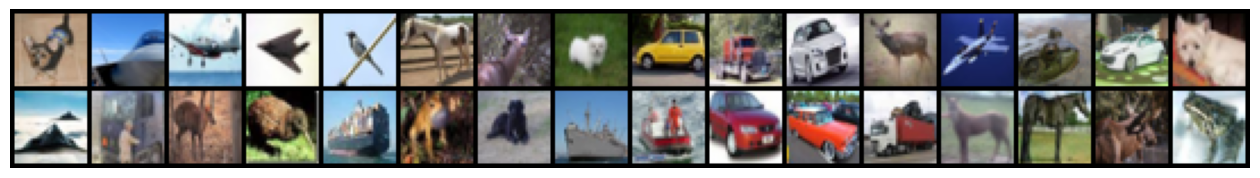

In [3]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [5]:
num_sample=5024
train_images ,train_labels=cifar10_dmap(train_loader,num_sample)


Train labels shape: (5024,)
Train images shape: (5024, 3072)


In [13]:
L_cifar=6
dmap_caifar = DiffusionMap()

start = time.time()
phi_l_cifar, lambda_l_cifar  = dmap_caifar.diffsuion_map_embedding(train_images,L_cifar)
end = time.time()

print(f"The run time is : {end - start}")


The run time is : 299.4012494087219


Print 6 largest eigenvalues for the corresponding dataset: 
 [1.         0.48261932 0.25968326 0.18917597 0.13489617 0.10647009]


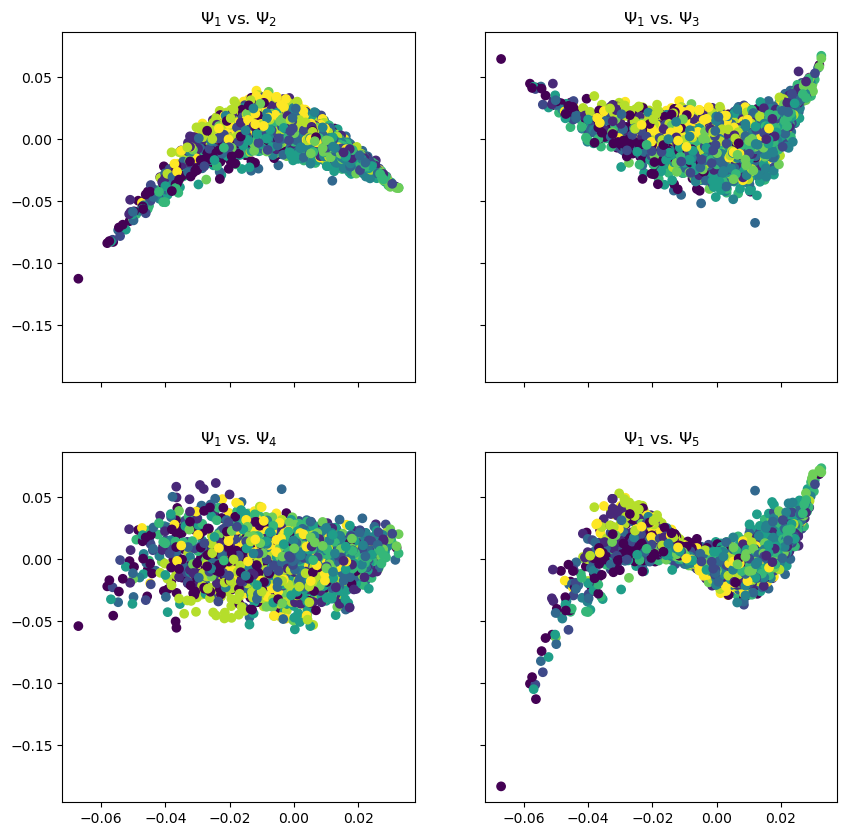

In [14]:
plot_diffusion_maps(num_sample, L_cifar, phi_l_cifar, lambda_l_cifar,train_labels,time=None)

In [ ]:

phi_l_plot = np.concatenate((phi_l_cifar[:, 1].reshape(-1, 1), phi_l_cifar[:, 4].reshape(-1, 1)), axis=1)
plot_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 4th eigenvectors")